# STELLAR CLASSIFICATION

## IMPORT LIBRARIES

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

## DATA LOAD

In [2]:
df= pd.read_csv("star_classification.csv")

In [3]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [6]:
df["class"].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [7]:
#y.replace({"Iris-setosa": 0,"Iris-versicolor":1, "Iris-virginica":2}, inplace=True)

In [8]:
df["class"].replace({"GALAXY":0, "STAR":1, "QSO":2}, inplace=True)

In [9]:
df["class"].value_counts()

0    59445
1    21594
2    18961
Name: class, dtype: int64

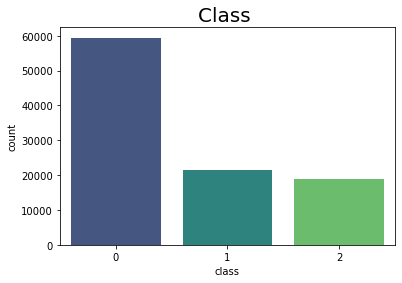

In [10]:
sns.countplot(df["class"], palette="viridis")
plt.title("Class ",fontsize=20)
plt.show()

## FEATURE SELECTION

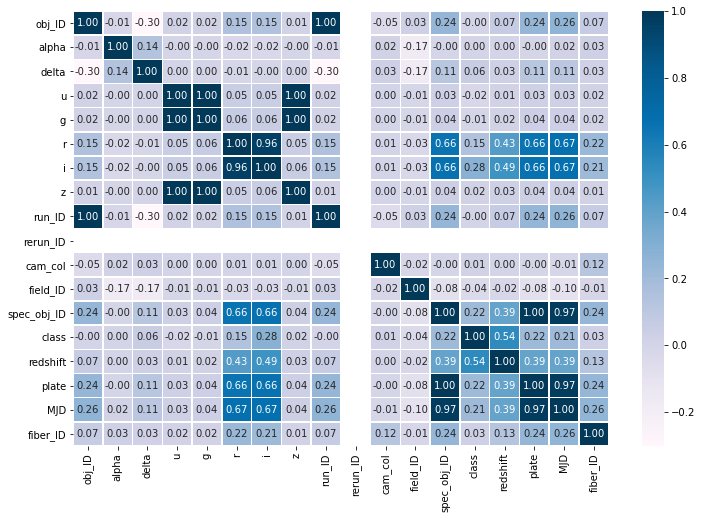

In [11]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f', ax=ax)
plt.show()

In [12]:
corr = df.corr()
corr["class"].sort_values()

field_ID      -0.038044
u             -0.017701
g             -0.005915
run_ID        -0.000049
obj_ID        -0.000047
alpha          0.004552
cam_col        0.014476
z              0.017352
fiber_ID       0.032053
delta          0.056643
r              0.150691
MJD            0.207262
spec_obj_ID    0.215722
plate          0.215722
i              0.284396
redshift       0.536822
class          1.000000
rerun_ID            NaN
Name: class, dtype: float64

In [13]:
df.drop(["field_ID", "run_ID", "obj_ID", "alpha", "fiber_ID", "rerun_ID"], axis=1, inplace=True)

In [14]:
df.head()

,delta,u,g,r,i,z,cam_col,spec_obj_ID,class,redshift,plate,MJD
0,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,6.543777e+18,0,0.634794,5812,56354
1,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,1.176014e+19,0,0.779136,10445,58158
2,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,5.152200e+18,0,0.644195,4576,55592
3,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,1.030107e+19,0,0.932346,9149,58039
4,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,6.891865e+18,0,0.116123,6121,56187


In [15]:
x=df.drop(["class"], axis=1)
y=df.loc[:,"class"]

In [16]:
x

,delta,u,g,r,i,z,cam_col,spec_obj_ID,redshift,plate,MJD
0,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,2,6.543777e+18,0.634794,5812,56354
1,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,5,1.176014e+19,0.779136,10445,58158
2,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,2,5.152200e+18,0.644195,4576,55592
3,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,3,1.030107e+19,0.932346,9149,58039
4,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,3,6.891865e+18,0.116123,6121,56187
...,...,...,...,...,...,...,...,...,...,...,...
99995,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,2,1.055431e+19,0.000000,9374,57749
99996,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,1,8.586351e+18,0.404895,7626,56934
99997,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,4,3.112008e+18,0.143366,2764,54535
99998,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,4,7.601080e+18,0.455040,6751,56368


## DATA SCALING

In [17]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [18]:
x

array([[ 0.42552871,  0.0597546 ,  0.05492616, ...,  0.07955728,
         0.22863291,  0.42320321],
       [ 0.36340227,  0.08804527,  0.07245617, ...,  0.2770962 ,
         1.79792394,  1.42072864],
       [ 0.58271274,  0.10332677,  0.06716517, ...,  0.09242283,
        -0.19002535,  0.00185377],
       ...,
       [-0.4293603 , -0.02553763, -0.0397295 , ..., -0.59298352,
        -0.80378648, -0.58261651],
       [ 1.14663054,  0.10607535,  0.03484026, ..., -0.16644396,
         0.54669125,  0.43094454],
       [ 1.28938133,  0.02018443,  0.03987583, ..., -0.04614265,
         0.76990791,  0.83791722]])

In [19]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: class, Length: 100000, dtype: int64

## DEALING WITH IMBALANCED DATA

In [20]:
smote = SMOTE()
xnew, ynew = smote.fit_resample(x, y)
xtrain, xtest, ytrain, ytest = train_test_split(xnew, ynew, test_size=0.2, random_state=1)

In [21]:
ynew.value_counts()

0    59445
1    59445
2    59445
Name: class, dtype: int64

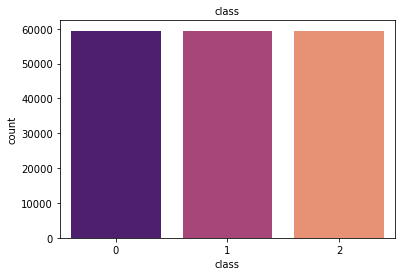

In [22]:
sns.countplot(ynew, palette='magma')
plt.title("class",fontsize=10)
plt.show()

## MACHINE LEARNING MODEL

In [23]:
rf=RandomForestClassifier()
rf.fit(xtrain, ytrain)
ypred=rf.predict(xtest)

In [28]:
print(f"Accuracy Score: ",(accuracy_score(ytest, ypred)))

Accuracy Score:  0.9825328735245465


In [31]:
print(f"Classification Report: \n",(classification_report(ytest, ypred)))

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     11969
           1       1.00      1.00      1.00     11845
           2       0.98      0.97      0.98     11853

    accuracy                           0.98     35667
   macro avg       0.98      0.98      0.98     35667
weighted avg       0.98      0.98      0.98     35667



In [32]:
print(f"Confusion Matrix: \n", (confusion_matrix(ytest, ypred)))

Confusion Matrix: 
 [[11703    43   223]
 [    1 11844     0]
 [  354     2 11497]]
